In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
price_list = pd.read_csv('C:\\Users\HDEC\Downloads\천안시실거래가_2009-2019.csv',encoding='cp949') #천안시 자료 불러오기
price_list['계약년월']=price_list['계약년월'].astype('str')


In [4]:
# 데이터 다듬기
price_list['거래금액(만원)'] = price_list['거래금액(만원)'].str.replace(',','').astype('int')
price_list['시군구'] = price_list['시군구'].str.replace('충청남도 천안','')
price_list[['구','법정동','읍면리']] = price_list['시군구'].str.split(expand=True)
price_list['평당단가'] = price_list['거래금액(만원)']/((price_list['전용면적(㎡)']/0.75)/3.3058).astype('int') #평당단가 추가
price_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115708 entries, 0 to 115707
Data columns (total 16 columns):
시군구         115708 non-null object
번지          115708 non-null object
본번          115708 non-null int64
부번          115708 non-null int64
단지명         115708 non-null object
전용면적(㎡)     115708 non-null float64
계약년월        115708 non-null object
계약일         115708 non-null int64
거래금액(만원)    115708 non-null int32
층           115708 non-null int64
건축년도        115708 non-null int64
도로명         115619 non-null object
구           115708 non-null object
법정동         115708 non-null object
읍면리         24142 non-null object
평당단가        115708 non-null float64
dtypes: float64(2), int32(1), int64(5), object(8)
memory usage: 10.2+ MB


In [5]:
# 구별 시계열 평당단가 데이터 추출
monthly_price_list = price_list.groupby(['구','계약년월']).mean()
es_price_list = monthly_price_list.loc['동남구']['평당단가']
wn_price_list = monthly_price_list.loc['서북구']['평당단가']

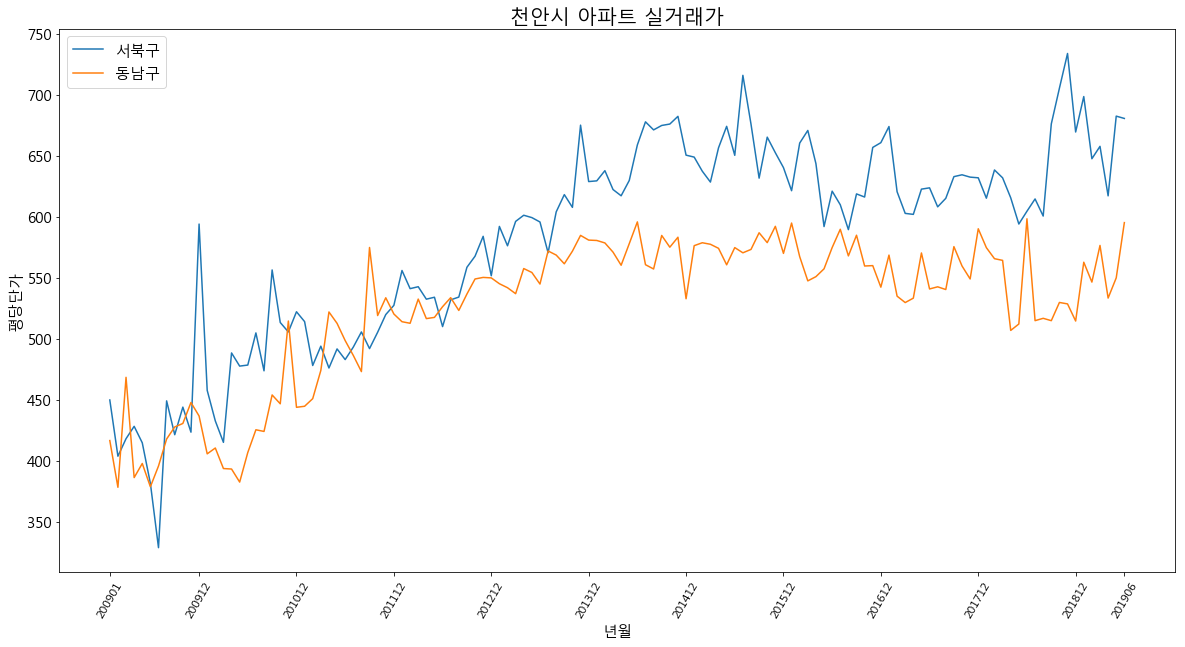

In [151]:
# 구별 시계열 평당단가 그래프
plt.figure(figsize=(20,10))
plt.plot(wn_price_list,label='서북구')
plt.plot(es_price_list, label='동남구')
plt.title('천안시 아파트 실거래가',fontsize=20)
plt.xlabel('년월',fontsize=15)
plt.ylabel('평당단가',fontsize=15)
#d=pd.date_range('2010-01-01','2019-12-31',freq='M')
plt.xticks([0,11,23,35,47,59,71,83,95,107,119,125],fontsize=12,rotation=60)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [164]:
#천안시 아파트 평단가 순위
price_list_2019 = price_list[price_list['계약년월'].str.contains('2019')]
apt_price_list = price_list_2019.groupby(['구']).mean()

#es_apt_price_list = apt_price_list.loc['동남구']
wn_apt_price_list = price_list_2019[price_list['구']=='서북구']
es_apt_price_list = price_list_2019[price_list['구']=='동남구']

wn_2019_sort = wn_apt_price_list.groupby(['단지명']).mean().sort_values(by=['평당단가'],ascending=False).head(10) 
wn_2019_sort = wn_2019_sort.reset_index()
es_2019_sort = es_apt_price_list.groupby(['단지명']).mean().sort_values(by=['평당단가'],ascending=False).head(10) 
es_2019_sort = es_2019_sort.reset_index()

C:\Users\HDEC\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\HDEC\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


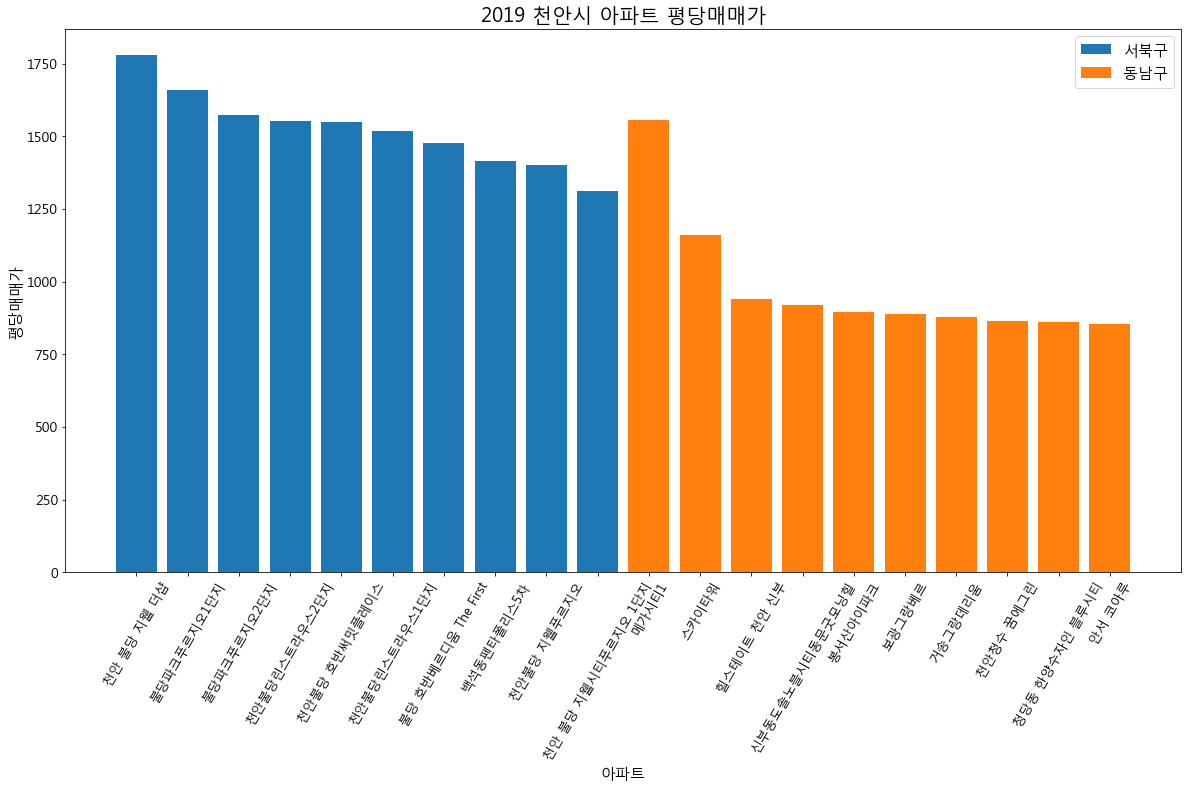

In [165]:
plt.figure(figsize=(20,10))
plt.bar(x=wn_2019_sort['단지명'],height=wn_2019_sort['평당단가'],label='서북구')
plt.bar(x=es_2019_sort['단지명'],height=es_2019_sort['평당단가'],label='동남구')
plt.title('2019 천안시 아파트 평당매매가',fontsize=20)
plt.xlabel('아파트',fontsize=15)
plt.ylabel('평당매매가',fontsize=15)
plt.xticks(fontsize=13,rotation=60)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)
plt.show()

In [64]:
#법정동별 평당매매가 시계열 그래프
monthly_bjd_price_list = price_list.groupby(['구','법정동','계약년월']).mean()
monthly_bjd_price_list=monthly_bjd_price_list.reset_index()  # 인덱스 초기화 함수 두번 사용불가
monthly_bjd_price_list.head()
monthly_bjd_price_list=monthly_bjd_price_list.set_index('계약년월') # 행을 인덱스로 설정하는 함수 두번 사용불가

,구,법정동,본번,부번,전용면적(㎡),계약일,거래금액(만원),층,건축년도,평당단가
계약년월,,,,,,,,,,
200901,동남구,구성동,323.500000,36.000000,84.729550,19.250000,15900.000000,3.500000,2005.000000,467.647059
200902,동남구,구성동,296.857143,22.285714,77.711157,17.000000,10550.000000,8.285714,1996.571429,356.162465
200903,동남구,구성동,294.000000,15.000000,79.010129,12.571429,14342.857143,9.857143,2003.142857,452.666066
200904,동남구,구성동,300.285714,19.714286,81.222929,18.714286,13839.285714,8.500000,2003.071429,429.621849
200905,동남구,구성동,287.500000,6.900000,75.641600,19.100000,12637.000000,11.100000,1999.500000,427.331869
200906,동남구,구성동,271.888889,3.666667,76.406756,15.222222,14272.222222,7.444444,2004.000000,473.556645
200907,동남구,구성동,271.888889,3.666667,71.932422,21.222222,13394.444444,7.666667,2004.000000,469.473623
200908,동남구,구성동,277.133333,9.400000,73.731533,15.733333,13694.666667,8.466667,2002.600000,470.721989
200909,동남구,구성동,273.818182,8.454545,69.668373,13.818182,14104.545455,9.636364,2004.363636,507.782659


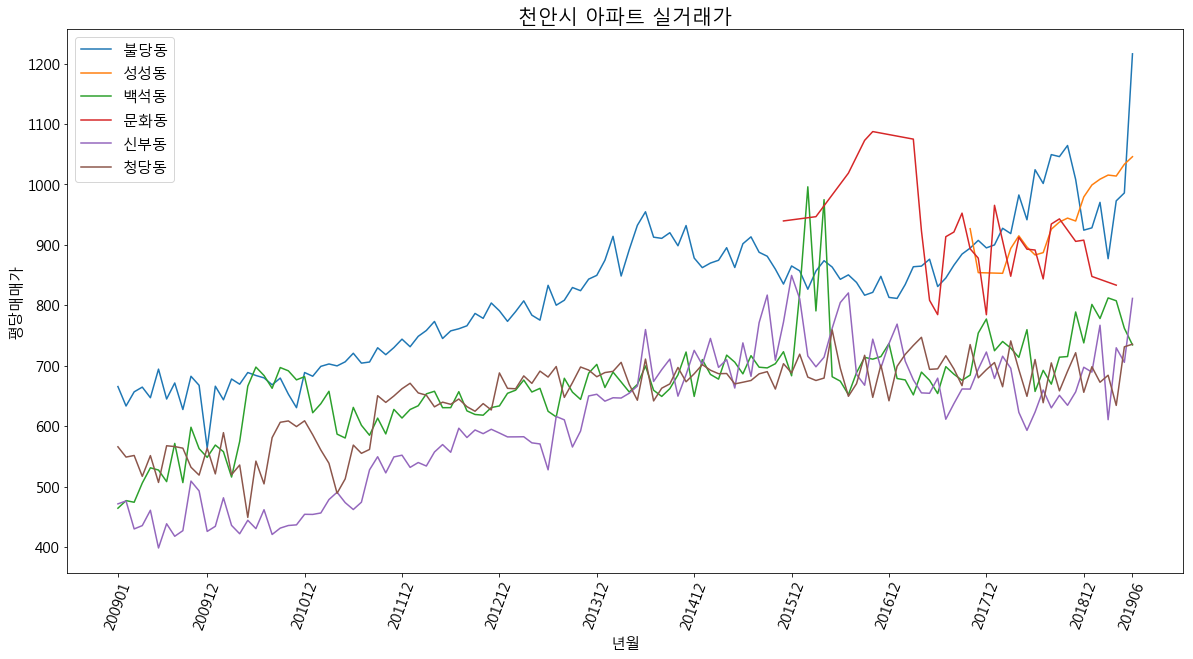

In [156]:
# 법정동별 시계열 평당매매가 그래프
bjd = ['불당동','성성동','백석동','문화동','신부동','청당동']#,'성정동','차암동','두정동','와촌동','신당동','성거읍',
      #'쌍용동','다가동','안서동','용곡동','봉명동','구성동','오룡동','신방동']
#bjd = price_list['법정동'].unique()  #법정동 항목 추출

plt.figure(figsize=(20,10))
plt.title('천안시 아파트 실거래가',fontsize=20)


for i in bjd:
    plt.plot(monthly_bjd_price_list[monthly_bjd_price_list['법정동']==i]['평당단가'],label=i)
    #print(monthly_bjd_price_list[monthly_bjd_price_list['법정동']==i]['평당단가'])
plt.xlabel('년월',fontsize=15)
plt.ylabel('평당매매가',fontsize=15)
plt.xticks([0,11,23,35,47,59,71,83,95,107,119,125],fontsize=15,rotation=70)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
    
plt.show()

In [158]:
#천안시 2019년 동별 아파트 평단가 순위
price_list_2019 = price_list[price_list['계약년월'].str.contains('2019')] #2019년만 추출

wn_apt_price_list = price_list_2019[price_list['구']=='서북구'] #서북구만 추출
es_apt_price_list = price_list_2019[price_list['구']=='동남구'] #동남구만 추출

wn_2019_sort = wn_apt_price_list.groupby(['법정동']).mean().sort_values(by=['평당단가'],ascending=False).head(10) 
wn_2019_sort = wn_2019_sort.reset_index()
es_2019_sort = es_apt_price_list.groupby(['법정동']).mean().sort_values(by=['평당단가'],ascending=False).head(10) 
es_2019_sort = es_2019_sort.reset_index()

C:\Users\HDEC\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\HDEC\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


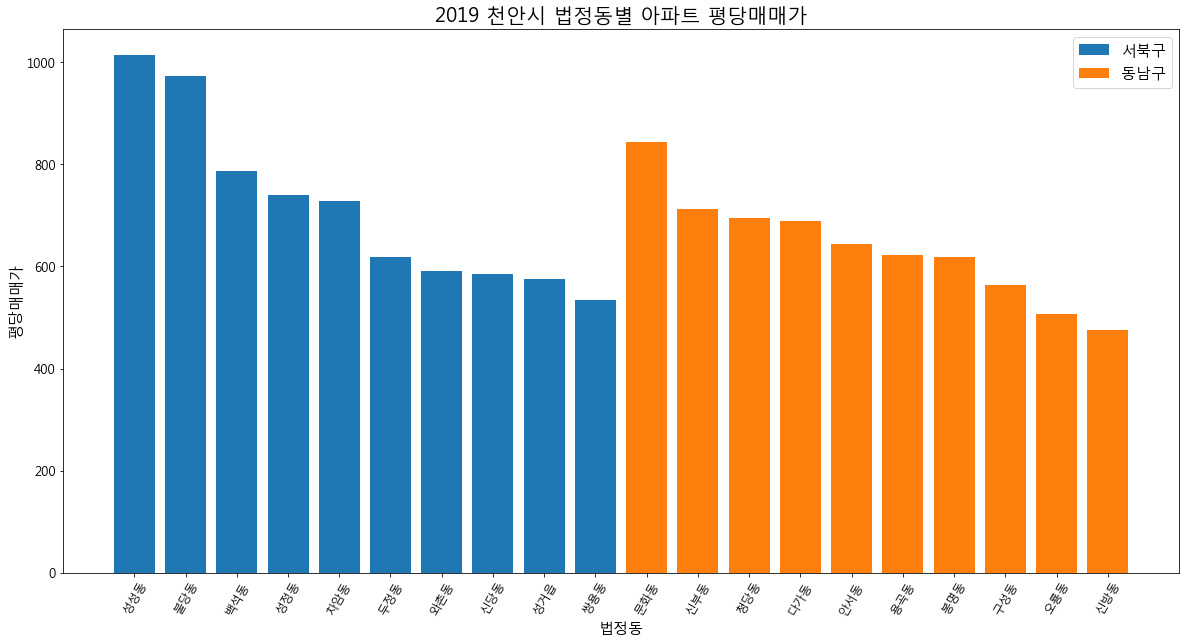

In [159]:
plt.figure(figsize=(20,10))
plt.bar(x=wn_2019_sort['법정동'],height=wn_2019_sort['평당단가'],label='서북구')
plt.bar(x=es_2019_sort['법정동'],height=es_2019_sort['평당단가'],label='동남구')
plt.title('2019 천안시 법정동별 아파트 평당매매가',fontsize=20)
plt.xlabel('법정동',fontsize=15)
plt.ylabel('평당매매가',fontsize=15)
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)
plt.show()

In [162]:
# 미분양 데이터 활용
inv_list = pd.read_csv('C:\\Users\HDEC\Downloads\천안시미분양정보2017-2019.csv',encoding='cp949') #천안시 미분양 자료 불러오기

In [145]:
# 미분양 시계열 데이터 추출
time_inv_list = inv_list.groupby(['구','법정동','년월']).sum()
time_inv_list = time_inv_list.reset_index()
#time_inv_list = time_inv_list.set_index('년월')
inv_bjd = time_inv_list['법정동'].unique() #법정동 항목 추출

C:\Users\HDEC\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\HDEC\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\HDEC\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


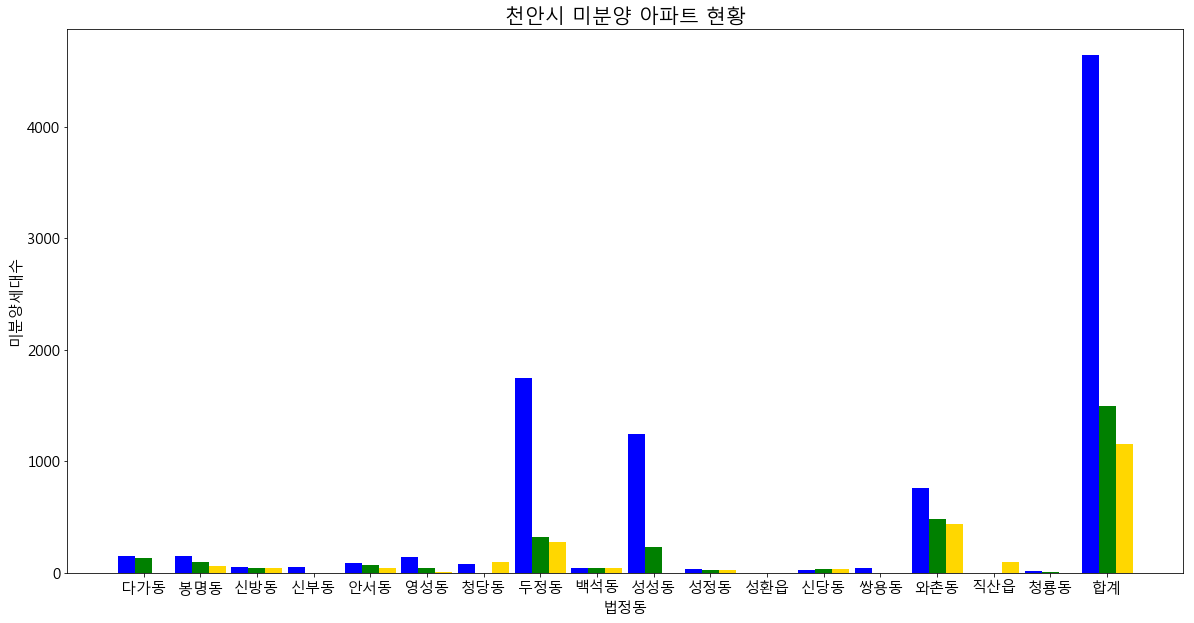

In [161]:
plt.figure(figsize=(20,10))
plt.title('천안시 미분양 아파트 현황',fontsize=20)

w=0.3
j=-1
for i in inv_bjd:
    j+=1
    plt.bar(x=j-w,height=time_inv_list[time_inv_list['법정동']==i][time_inv_list['년월']==201712]['미분양수'],width=0.3,color='blue',label='2017년')
    plt.bar(x=j,height=time_inv_list[time_inv_list['법정동']==i][time_inv_list['년월']==201812]['미분양수'],width=0.3,color='green',label='2018년')
    plt.bar(x=j+w,height=time_inv_list[time_inv_list['법정동']==i][time_inv_list['년월']==201905]['미분양수'],width=0.3,color='gold',label='2019년')
  
plt.xlabel('법정동',fontsize=15)
plt.ylabel('미분양세대수',fontsize=15)
plt.xticks(range(18),inv_bjd,fontsize=15,rotation=0)
plt.yticks(fontsize=15)

    
plt.show()